In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-13 17:26:32.974546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 17:26:32.995526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 17:26:33.001900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 17:26:33.018191: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 17:26:34.931504: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
1628,RF-SPUD,flare1,turn,0.3,"{'knn': 23, 'OD_method': 'absolute_distance', ...","{'42': 0.9040247678018576, '1738': 0.897832817...","{'42': 9.585062638384343e-06, '1738': 0.0, '52...","{'42': 0.8856589147286822, '1738': 0.879844961...","{'42': 0.8615384615384616, '1738': 0.876923076...","{'42': 0.8692307692307693, '1738': 0.884615384...","{'42': 0.8155745489078822, '1738': 0.837676609...","{'42': 0.833273228319668, '1738': 0.8337957124...","{'42': {'RF-OOB': 0.9127906976744186, 'KNN': 0...",{}
1902,RF-SPUD,hill_valley,distort,0.3,"{'knn': 15, 'OD_method': 'default', 'agg_metho...","{'42': 0.528052805280528, '1738': 0.5016501650...","{'42': 5.446089163371783e-06, '1738': 2.723044...","{'42': 0.6570247933884298, '1738': 0.625, '527...","{'42': 0.5450819672131147, '1738': 0.5, '5271'...","{'42': 0.5040983606557377, '1738': 0.418032786...","{'42': 0.5022216830196691, '1738': 0.416780234...","{'42': 0.5415153963367865, '1738': 0.500134408...","{'42': {'RF-OOB': 0.6528925619834711, 'KNN': 0...",{}
1634,SPUD,flare1,even,0.3,"{'knn': 51, 'OD_method': 'default', 'agg_metho...",{'42': 0.8947368421052632},{'42': 0.0446280516443175},{'42': 0.872093023255814},{'42': 0.8692307692307693},{'42': 0.8769230769230769},{'42': 0.8194199243379572},{'42': 0.8294244068517928},"{'42': {'RF-OOB': 0.872093023255814, 'KNN': 0....","{'knn': 0.011655078141769103, 'OD_method': 0.0..."
682,SPUD,FacebookMetrics,random,0.3,"{'knn': 32, 'OD_method': 'default', 'agg_metho...","{'42': -0.11246658139674515, '1738': -0.169568...","{'42': 9.386797265585144e-05, '1738': 1.224364...","{'42': 0.190596764494239, '1738': 0.3107595569...","{'42': 0.3015491109799885, '1738': 0.365570385...","{'42': 0.3419656059485304, '1738': 0.537692425...","{'42': 0.6347960853584517, '1738': 0.593084501...","{'42': 0.6540001986046036, '1738': 0.694772779...","{'42': {'RF-OOB': 0.24504328151468135, 'KNN': ...","{'knn': 0.09636426421894927, 'OD_method': 0.02..."
2202,MASH-,crx,even,0.3,"{'knn': 16, 'page_rank': 'full', 'DTM': 'helli...",{'42': 0.8539156626506024},{'42': 0.19884281100304835},{'42': 0.8022598870056498},{'42': 0.8195488721804511},{'42': 0.7969924812030075},{'42': 0.7969924812030075},{'42': 0.8195488721804511},"{'42': {'RF-OOB': 0.783427495291902, 'KNN': 0....","{'knn': 0.05278303927049932, 'page_rank': 0.00..."


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


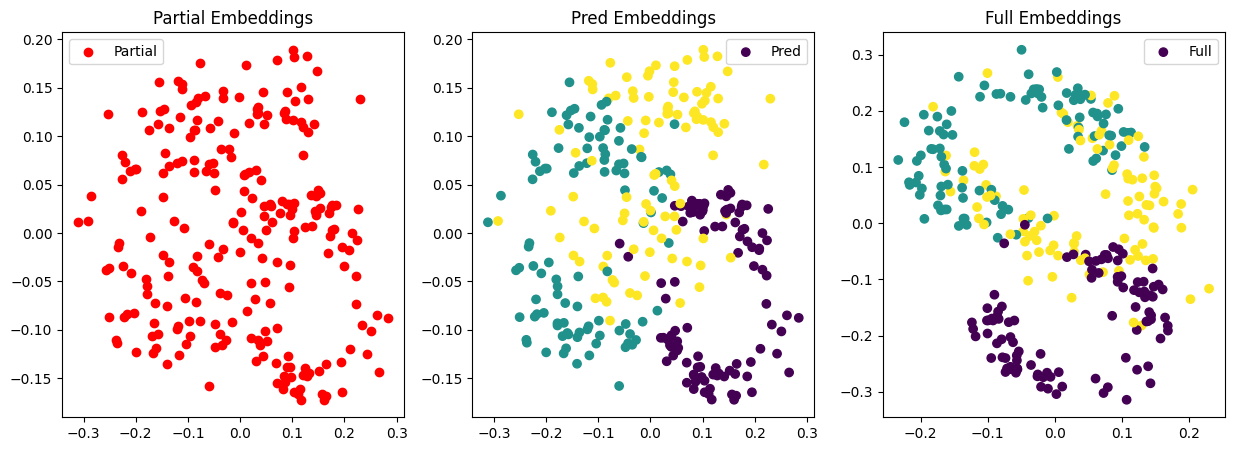

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

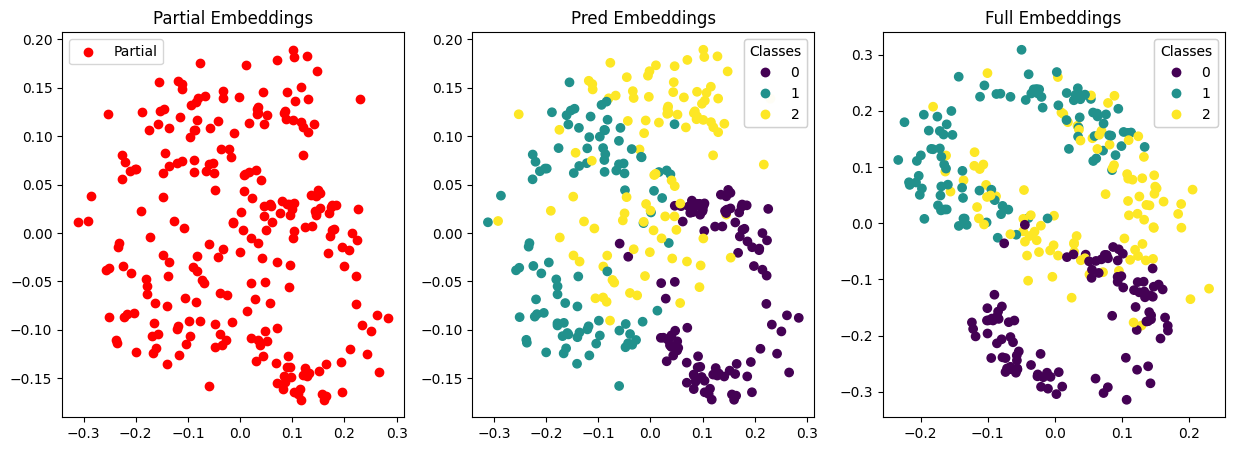

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


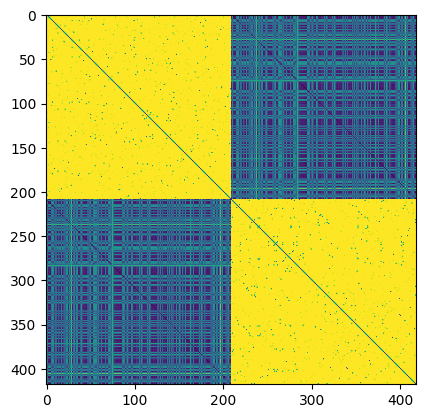

In [8]:
print(tasks[0])
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
plt.imshow(block_full)

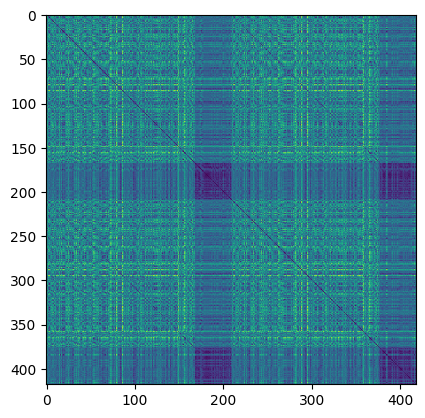

In [13]:
from scipy.spatial.distance import pdist, squareform
plt.imshow(squareform(pdist(emb_pred)))
#plt.imshow(squareform(pdist(emb_full)))

# Marshall's Tests here?

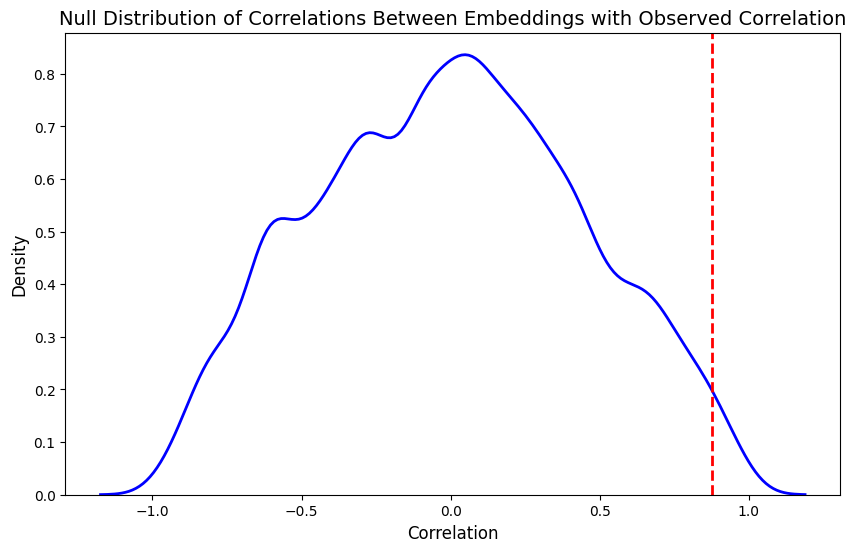

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/SPUD_iris_turn.json
SPUD iris turn {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'}
0.8770677510478204 0.0144


In [9]:
r_obs, p_value = mantel_test(*iris_task, plot = True)
print(*iris_task)
print(r_obs, p_value)

In [10]:
#Unpack all the code and run the mantel test
for i in range(5):
    task_to_run = tasks[i+10]
    print(task_to_run)
    r_obs, p_value = mantel_test(method = task_to_run[0], dataset=task_to_run[1], split = task_to_run[2], params = task_to_run[3], plot = True)
    print(r_obs, p_value)

('MASH-', 'ComputerHardware', 'random', {'knn': 42, 'page_rank': 'None', 'DTM': 'kl', 'density_normalization': False})


ValueError: x and y must have length at least 2.

In [11]:
p_value

0.0159

In [10]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[:5]
        )


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/5 [00:00<?, ?it/s]2025-01-13 17:09:04.973177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 17:09:04.991319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 17:09:04.996832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 17:09:05.010618: I tensorflow/core/platf

ValueError: x and y must have length at least 2.

In [11]:
def debug_mantel_test(*args):
    print(f"Arguments passed to mantel_test: {args}")
    return mantel_test(*args)

with tqdm_joblib(tqdm(total=5)): #This includes a progress bar :)
    with Parallel(n_jobs=1) as parallel:
        parallel(
            delayed(debug_mantel_test)(*task)
            for task in tasks[:5]
        )

Arguments passed to mantel_test: ('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-SPUD_ComputerHardware_even.json
Arguments passed to mantel_test: ('RF-MASH-', 'ComputerHardware', 'distort', {'knn': 2, 'page_rank': 'full', 'DTM': 'log', 'density_normalization': False})
Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-MASH-_ComputerHardware_distort.json


Arguments passed to mantel_test: ('SPUD', 'ComputerHardware', 'random', {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'})





896it [03:07,  4.77it/s]


ValueError: x and y must have length at least 2.

# Marshall's Vizualizations Here?